# Dependency and API Setup

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import gmaps
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Import API keys
from api_keys import api_key
from api_keys import gkey

# Perform Weather API Calls to obtain city weather for relation to funding

In [22]:
# # List for holding lat_lngs and cities
# lat_lngs = []
# city = []

# city = pd.read_csv("../startup_datasets/Cities.csv")


# # Print the city count to confirm sufficient count
# len(city)
# cities = np.unique(city)
# print(cities)
# uvalues = pd.DataFrame(cities)
# uvalues
# clouds = []
# country = []
# date = []
# humidity = []
# lat = []
# lng = []
# max_temp =[]
# wind_speed = []
# city2 = []
# cityid = []


# for c in cities:
#     url = f"http://api.openweathermap.org/data/2.5/weather?q={c},{'US'}&APPID={api_key}&units=imperial"
#     print(url)
#     weather_response= requests.get(url)
#     print(weather_response)

#     if weather_response.status_code == 200:
#         print(weather_response)
#         weather_json=weather_response.json()
#         print(weather_json)
#         city2.append(weather_json['name'])
#         clouds.append(weather_json['clouds']['all'])
#         country.append(weather_json['sys']['country'])
#         date.append(weather_json['dt'])
#         humidity.append(weather_json['main']['humidity'])
#         lat.append(weather_json['coord']['lat'])
#         lng.append(weather_json['coord']['lon'])
#         max_temp.append(weather_json['main']['temp_max'])
#         wind_speed.append(weather_json['wind']['speed'])
#         cityid.append(weather_json['id'])

# Convert Raw Weather Data to DataFrame

In [23]:
# Convert to DataFrame
# weather_df = pd.DataFrame(columns={"City" : city2,
#                                 "Cloudiness" : clouds,
#                                 "Country" : country,
#                                 "Date" : date,
#                                 "Humidity" : humidity,
#                                 "Lat" : lat,
#                                 "Lng" : lng, 
#                                 "Max Temp" : max_temp,
#                                 "Wind Speed" : wind_speed})

# weather_df["City"] = city2
# weather_df["Cloudiness"] = clouds
# weather_df["Country"] = country
# weather_df["Date"] = date
# weather_df["Humidity"] = humidity
# weather_df["Lat"] = lat
# weather_df["Lng"] = lng
# weather_df["Max Temp"] = max_temp
# weather_df["Wind Speed"] = wind_speed

# export_csv = weather_df.to_csv (r"../startup_datasets/weather.csv", index = None, header=True) 
# weather_df.head()

# city_name_df = pd.DataFrame(columns={"City Name" : city2,
#                                 "City Number" : cityid})
# city_name_df["City Name"] = city2
# city_name_df["City Number"] = cityid
# export_csv = city_name_df.to_csv (r"../startup_datasets/city_name_number_df.csv", index = None, header=True) 
# city_name_df.head()

# Read main dataset in dataframe

In [24]:
# read Main Starter File with Funding and weather data combined (CSV)
starter_data = pd.read_csv("../startup_datasets/final_data1.csv")
starter_data.head()

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,...,founded_at,Coordinates,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Uber,Manufacturing,8207450000,operating,USA,CA,San Francisco,13,AITV (Accelerate IT Ventures):1000000000|Baidu...,53,...,2009,37.727239:-123.032229,20,US,1567267822,77,37.78,-122.42,69.01,3.36
1,Clearwire,Software,5820000000,acquired,USA,WA,Kirkland,6,Bell Canada:100000000|BrightHouse:4700000000.0...,11,...,2003,41.837551:-87.681844,1,US,1567267756,68,43.08,-75.38,71.01,11.41
2,MediaVast,Marketing,4715000000,acquired,USA,NY,New York,2,Baroda Ventures:4715000000.0|QTV Capital:15000...,4,...,1999,34.07923:-118.402437,1,US,1567267785,47,40.73,-73.99,80.01,7.31
3,First Data Corporation,Finance,3500000000,ipo,USA,GA,Atlanta,1,KKR (Kohlberg Kravis Roberts & Co.):3500000000,1,...,1971,41.837551:-87.681844,1,US,1567267668,51,33.75,-84.39,86.00,3.36
4,Facebook,Education,2425700000,ipo,USA,CA,Menlo Park,11,Accel:12700000|DST Global:1700000000.0|Elevati...,16,...,2004,40.664274:-73.9385,20,US,1567267772,77,37.45,-122.18,71.01,3.36


### Status Vs. Category Analysis

In [25]:
#Status vs. Category
svc_df = starter_data[["category_list", "status"]]
svc_df.head()

,category_list,status
0,Manufacturing,operating
1,Software,acquired
2,Marketing,acquired
3,Finance,ipo
4,Education,ipo


In [26]:
svc_df["category_list"].value_counts()

Software         4769
Technology       1539
Services         1085
Finance          1072
Marketing        1023
Health            822
Entertainment     736
Manufacturing     657
Education         511
Mobile            477
Hardware          372
Communication     120
Sports            108
Management        108
Food               80
Business           65
Travel             57
Automation         37
Construction       18
Employment         13
Style              11
Entrepreneur        4
Gadget              1
Name: category_list, dtype: int64

In [27]:
#operating list
operating_list = svc_df.loc[svc_df["status"] == "operating", :]
operating_finance_count = operating_list.loc[operating_list["category_list"] == "Finance", :]
ofc =operating_finance_count["status"].count()
operating_software_count = operating_list.loc[operating_list["category_list"] == "Software", :]
osc =operating_software_count["status"].count()
operating_technology_count = operating_list.loc[operating_list["category_list"] == "Technology", :]
otc =operating_technology_count["status"].count()
operating_services_count = operating_list.loc[operating_list["category_list"] == "Services", :]
osec =operating_services_count["status"].count()
operating_marketing_count = operating_list.loc[operating_list["category_list"] == "Marketing", :]
omc =operating_marketing_count["status"].count()
operating_health_count = operating_list.loc[operating_list["category_list"] == "Health", :]
ohc =operating_health_count["status"].count()
operating_entertainment_count = operating_list.loc[operating_list["category_list"] == "Entertainment", :]
oec =operating_entertainment_count["status"].count()

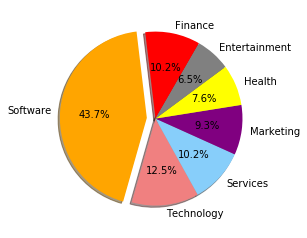

In [28]:
#pie chart for operating and category
# Labels for the sections of our pie chart
labels = ["Finance", "Software", "Technology", "Services", "Marketing", "Health", "Entertainment"]

# The values of each section of the pie chart
sizes = [ofc, osc, otc, osec, omc, ohc, oec]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "purple", "yellow", "grey"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0, 0, 0, 0, 0)
#plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=60)
#export image
plt.savefig("../images/operating_by_category.png")

In [29]:
#acquired by category
acquired_list = svc_df.loc[svc_df["status"] == "acquired", :]
acquired_finance_count = acquired_list.loc[acquired_list["category_list"] == "Finance", :]
afc =acquired_finance_count["status"].count()
acquired_software_count = acquired_list.loc[acquired_list["category_list"] == "Software", :]
asc =acquired_software_count["status"].count()
acquired_technology_count = acquired_list.loc[acquired_list["category_list"] == "Technology", :]
atc =acquired_technology_count["status"].count()
acquired_services_count = acquired_list.loc[acquired_list["category_list"] == "Services", :]
asec =acquired_services_count["status"].count()
acquired_marketing_count = acquired_list.loc[acquired_list["category_list"] == "Marketing", :]
amc =acquired_marketing_count["status"].count()
acquired_health_count = acquired_list.loc[acquired_list["category_list"] == "Health", :]
ahc =acquired_health_count["status"].count()
acquired_entertainment_count = acquired_list.loc[acquired_list["category_list"] == "Entertainment", :]
aec =acquired_entertainment_count["status"].count()

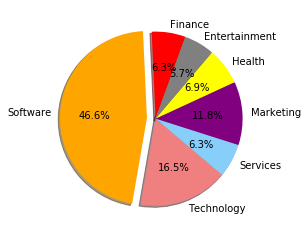

In [30]:
#pie chart for aquired and category
# Labels for the sections of our pie chart
labels = ["Finance", "Software", "Technology", "Services", "Marketing", "Health", "Entertainment"]

# The values of each section of the pie chart
sizes = [afc, asc, atc, asec, amc, ahc, aec]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "purple", "yellow", "grey"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0, 0, 0, 0, 0)
#plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=70)
#export image
plt.savefig("../images/acquired_by_category.png")

In [31]:
#ipo by category
ipo_list = svc_df.loc[svc_df["status"] == "ipo", :]
ipo_finance_count = ipo_list.loc[ipo_list["category_list"] == "Finance", :]
ifc =ipo_finance_count["status"].count()
ipo_software_count = ipo_list.loc[ipo_list["category_list"] == "Software", :]
isc =ipo_software_count["status"].count()
ipo_technology_count = ipo_list.loc[ipo_list["category_list"] == "Technology", :]
itc =ipo_technology_count["status"].count()
ipo_services_count = ipo_list.loc[ipo_list["category_list"] == "Services", :]
isec =ipo_services_count["status"].count()
ipo_marketing_count = ipo_list.loc[ipo_list["category_list"] == "Marketing", :]
imc =ipo_marketing_count["status"].count()
ipo_health_count = ipo_list.loc[ipo_list["category_list"] == "Health", :]
ihc =ipo_health_count["status"].count()
ipo_entertainment_count = ipo_list.loc[ipo_list["category_list"] == "Entertainment", :]
iec =ipo_entertainment_count["status"].count()

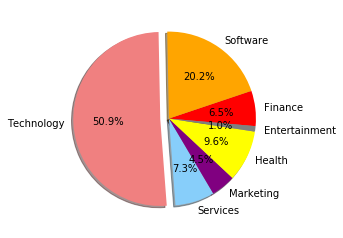

In [32]:
#pie chart for ipo and category
# Labels for the sections of our pie chart
labels = ["Finance", "Software", "Technology", "Services", "Marketing", "Health", "Entertainment"]

# The values of each section of the pie chart
sizes = [ifc, isc, itc, isec, imc, ihc, iec]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "purple", "yellow", "grey"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1, 0, 0, 0, 0)
#plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=355)
#export image
plt.savefig("../images/ipo_by_category.png")

In [33]:
#closed by category
closed_list = svc_df.loc[svc_df["status"] == "closed", :]
closed_finance_count = closed_list.loc[closed_list["category_list"] == "Finance", :]
cfc =closed_finance_count["status"].count()
closed_software_count = closed_list.loc[closed_list["category_list"] == "Software", :]
csc =closed_software_count["status"].count()
closed_technology_count = closed_list.loc[closed_list["category_list"] == "Technology", :]
ctc =closed_technology_count["status"].count()
closed_services_count = closed_list.loc[closed_list["category_list"] == "Services", :]
csec =closed_services_count["status"].count()
closed_marketing_count = closed_list.loc[closed_list["category_list"] == "Marketing", :]
cmc =closed_marketing_count["status"].count()
closed_health_count = closed_list.loc[closed_list["category_list"] == "Health", :]
chc =closed_health_count["status"].count()
closed_entertainment_count = closed_list.loc[closed_list["category_list"] == "Entertainment", :]
cec =closed_entertainment_count["status"].count()

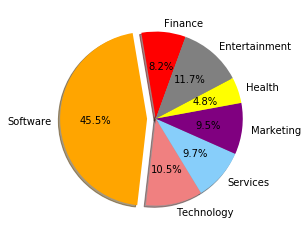

In [34]:
#pie chart for closed and category
# Labels for the sections of our pie chart
labels = ["Finance", "Software", "Technology", "Services", "Marketing", "Health", "Entertainment"]

# The values of each section of the pie chart
sizes = [cfc, csc, ctc, csec, cmc, chc, cec]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "purple", "yellow", "grey"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0, 0, 0, 0, 0)
#plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=70)
#export image
plt.savefig("../images/closed_by_category.png")

In [35]:
#multiple plot with comparitive sizes"

labels = ["Finance", "Software", "Technology", "Services", "Marketing", "Health", "Entertainment"]

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Operating', 'Closed'])
fig.add_trace(go.Pie(labels=labels, values=[ofc, osc, otc, osec, omc, ohc, oec], scalegroup='one',
                     name="Operating"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[cfc, csc, ctc, csec, cmc, chc, cec], scalegroup='one',
                     name="Acquired"), 1, 2)

fig.update_layout(title_text='Company Status by Category')
fig.show()

In [36]:
#multiple plot with comparitive sizes"

labels = ["Finance", "Software", "Technology", "Services", "Marketing", "Health", "Entertainment"]

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['IPO', 'Aquired'])
fig.add_trace(go.Pie(labels=labels, values=[ifc, isc, itc, isec, imc, ihc, iec], scalegroup='one',
                     name="IPO"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[afc, asc, atc, asec, amc, ahc, aec], scalegroup='one',
                     name="Closed"), 1, 2)

fig.update_layout(title_text='Company Status by Category')
fig.show()

In [37]:
#multiple plot with comparitive sizes"

labels = ["Finance", "Software", "Technology", "Services", "Marketing", "Health", "Entertainment"]

fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles = ['Operating', 'Acquired', 'IPO', 'Closed'])
fig.add_trace(go.Pie(labels=labels, values=[ofc, osc, otc, osec, omc, ohc, oec], scalegroup='one',
                     name="Operating"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[afc, asc, atc, asec, amc, ahc, aec], scalegroup='one',
                     name="Acquired"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=[ifc, isc, itc, isec, imc, ihc, iec], scalegroup='one',
                     name="IPO"), 2, 1)
fig.add_trace(go.Pie(labels=labels, values=[cfc, csc, ctc, csec, cmc, chc, cec], scalegroup='one',
                     name="Closed"), 2, 2)

fig.update_layout(title_text='Company Status by Category (Comparative)')
fig.show()

In [49]:
labels = ["Finance", "Software", "Technology", "Services", "Marketing", "Health", "Entertainment"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[ofc, osc, otc, osec, omc, ohc, oec], name="Operating"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[afc, asc, atc, asec, amc, ahc, aec], name="Acquired"),
              1, 2)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Company Status by Category",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Operating', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Acquired', x=0.83, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [56]:
labels = ["Finance", "Software", "Technology", "Services", "Marketing", "Health", "Entertainment"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[ifc, isc, itc, isec, imc, ihc, iec], name="IPO"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[cfc, csc, ctc, csec, cmc, chc, cec], name="Closed"),
              1, 2)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='IPO', x=0.2, y=0.5, font_size=20, showarrow=False),
                 dict(text='Closed', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

### Investors By City Data

In [7]:
#create initial df
ibc_df = starter_data[["city", "Number_of_Investors", "funding_total_usd"]]

#funding per city
funding_per_city = ibc_df.groupby(['city'])['funding_total_usd'].sum()

#investors per city
investors_per_city = ibc_df.groupby(['city'])['Number_of_Investors'].sum()

#merge df
inv_and_funds_by_city = pd.merge(investors_per_city, funding_per_city, on="city")
inv_and_funds_by_city.reset_index(inplace=True)

#drop values for cleaner graph
indexNames = inv_and_funds_by_city[ inv_and_funds_by_city['Number_of_Investors'] < 200 ].index
# Delete these row indexes from dataFrame
inv_and_funds_by_city.drop(indexNames , inplace=True)

In [19]:
#set axis
x_axis = inv_and_funds_by_city["city"]
investors_y = inv_and_funds_by_city["Number_of_Investors"]
funding_y = inv_and_funds_by_city["funding_total_usd"]
#create plot
size = funding_y
fig = go.Figure(data=[go.Scatter(
    x=x_axis,
    y=investors_y,
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4,
        color=funding_y,
        colorscale='Viridis'

    )
)])
fig.update_layout(
    title='Number of Investors per City',
    xaxis=dict(
        title='City',
        gridcolor='grey',
        gridwidth=1
    ),
    yaxis=dict(
        title='Number of Investors',
        gridcolor='grey',
        gridwidth=1,
    )
)
fig.show()

### Alt - State By investors & funding

In [11]:
#create initial df
ibs_df = starter_data[["state_code", "Number_of_Investors", "funding_total_usd"]]

#funding per city
funding_per_state = ibs_df.groupby(["state_code"])["funding_total_usd"].sum()

#investors per city
investors_per_state = ibs_df.groupby(["state_code"])["Number_of_Investors"].sum()

#merge df
inv_and_funds_by_state = pd.merge(investors_per_state, funding_per_state, on="state_code")
inv_and_funds_by_state.reset_index(inplace=True)
inv_and_funds_by_state.head()

,state_code,Number_of_Investors,funding_total_usd
0,AK,3,83850000
1,AL,20,127240000
2,AR,51,175307006
3,AZ,261,1657686366
4,CA,29670,199936523508


In [10]:
#set axis
x_axis2 = inv_and_funds_by_state["state_code"]
investors_y2 = inv_and_funds_by_state["Number_of_Investors"]
funding_y2 = inv_and_funds_by_state["funding_total_usd"]
#create plot
size = funding_y2
fig = go.Figure(data=[go.Scatter(
    x=x_axis2,
    y=investors_y2,
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4,
        color=funding_y2,
        colorscale='Viridis'

    )
)])
fig.update_layout(
    title='Number of Investors per State',
    xaxis=dict(
        title='State',
        gridcolor='grey',
        gridwidth=1
    ),
    yaxis=dict(
        title='Number of Investors',
        gridcolor='grey',
        gridwidth=1,
    )
)
fig.show()

### Show Status of company - average of success vs failure, relationship of funding and status

In [4]:
starter_data.head()

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,...,founded_at,Coordinates,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Uber,Manufacturing,8207450000,operating,USA,CA,San Francisco,13,AITV (Accelerate IT Ventures):1000000000|Baidu...,53,...,2009,37.727239:-123.032229,20,US,1567267822,77,37.78,-122.42,69.01,3.36
1,Clearwire,Software,5820000000,acquired,USA,WA,Kirkland,6,Bell Canada:100000000|BrightHouse:4700000000.0...,11,...,2003,41.837551:-87.681844,1,US,1567267756,68,43.08,-75.38,71.01,11.41
2,MediaVast,Marketing,4715000000,acquired,USA,NY,New York,2,Baroda Ventures:4715000000.0|QTV Capital:15000...,4,...,1999,34.07923:-118.402437,1,US,1567267785,47,40.73,-73.99,80.01,7.31
3,First Data Corporation,Finance,3500000000,ipo,USA,GA,Atlanta,1,KKR (Kohlberg Kravis Roberts & Co.):3500000000,1,...,1971,41.837551:-87.681844,1,US,1567267668,51,33.75,-84.39,86.00,3.36
4,Facebook,Education,2425700000,ipo,USA,CA,Menlo Park,11,Accel:12700000|DST Global:1700000000.0|Elevati...,16,...,2004,40.664274:-73.9385,20,US,1567267772,77,37.45,-122.18,71.01,3.36


In [5]:
soc_df = starter_data[["category_list", "status", "funding_total_usd"]]
soc_df.head()

,category_list,status,funding_total_usd
0,Manufacturing,operating,8207450000
1,Software,acquired,5820000000
2,Marketing,acquired,4715000000
3,Finance,ipo,3500000000
4,Education,ipo,2425700000


In [6]:
grouped = soc_df.groupby(['status', 'category_list'])['funding_total_usd'].sum()
grouped_df = grouped.reset_index()
grouped_df.head()

,status,category_list,funding_total_usd
0,acquired,Automation,166500000
1,acquired,Business,32700000
2,acquired,Communication,883198909
3,acquired,Construction,1500000
4,acquired,Education,476300000


In [16]:
#category and funding by status
#operating
operating_list = grouped_df.loc[grouped_df["status"] == "operating", :]
operating_list.reset_index(inplace=True)
operating_list = operating_list[["status","category_list","funding_total_usd"]]
operating_cat_list = operating_list["category_list"]
operating_funding_list = operating_list["funding_total_usd"]
#aquired
acquired_list = grouped_df.loc[grouped_df["status"] == "acquired", :]
acquired_list.reset_index(inplace=True)
acquired_list = acquired_list[["status","category_list","funding_total_usd"]]
acquired_cat_list = acquired_list["category_list"]
acquired_funding_list = acquired_list["funding_total_usd"]
#closed
closed_list = grouped_df.loc[grouped_df["status"] == "closed", :]
closed_list.reset_index(inplace=True)
closed_list = closed_list[["status","category_list","funding_total_usd"]]
closed_cat_list = closed_list["category_list"]
closed_funding_list = closed_list["funding_total_usd"]
#ipo
ipo_list = grouped_df.loc[grouped_df["status"] == "ipo", :]
ipo_list.reset_index(inplace=True)
ipo_list = ipo_list[["status","category_list","funding_total_usd"]]
ipo_cat_list = ipo_list["category_list"]
ipo_funding_list = ipo_list["funding_total_usd"]
ipo_list

,status,category_list,funding_total_usd
0,ipo,Communication,1488236190
1,ipo,Construction,207900000
2,ipo,Education,2795675000
3,ipo,Entertainment,168848794
4,ipo,Finance,6126816528
5,ipo,Hardware,3798595855
6,ipo,Health,4079674843
7,ipo,Management,357911999
8,ipo,Manufacturing,2470683282
9,ipo,Marketing,2823873657


In [20]:
grouped_2 = soc_df.groupby(["category_list", "status"])["funding_total_usd"].sum()
grouped_2 = grouped_2.reset_index()
grouped_2

,category_list,status,funding_total_usd
0,Automation,acquired,166500000
1,Automation,closed,20000000
2,Automation,operating,372524294
3,Business,acquired,32700000
4,Business,closed,22600000
5,Business,operating,1367126471
6,Communication,acquired,883198909
7,Communication,closed,59577637
8,Communication,ipo,1488236190
9,Communication,operating,1621301585
